In [1]:
import json

In [2]:
with open('pricedetail.json') as f:
    d = json.load(f)

In [3]:
d[:3]

[{'d0_open': 9.8,
  'd0_wd': 3,
  'd1_open': 9.51,
  'd1_wd': 4,
  'd2_open': 9.57,
  'd2_wd': 5,
  'd3_open': 9.75,
  'd3_wd': 6,
  'data_date': '2014-04-22',
  'security_id': '000008'},
 {'d0_open': 20.03,
  'd0_wd': 3,
  'd1_open': 20.35,
  'd1_wd': 4,
  'd2_open': 20.31,
  'd2_wd': 5,
  'd3_open': 21.0,
  'd3_wd': 6,
  'data_date': '2014-11-04',
  'security_id': '000008'},
 {'d0_open': 11.19,
  'd0_wd': 3,
  'd1_open': 10.57,
  'd1_wd': 4,
  'd2_open': 11.38,
  'd2_wd': 5,
  'd3_open': 10.76,
  'd3_wd': 6,
  'data_date': '2016-03-29',
  'security_id': '000008'}]

In [4]:
dd = [ [i['d1_open']/i['d0_open']-1, i['d2_open']/i['d1_open']-1, i['d3_open']/i['d2_open']-1] for i in d]

In [5]:
dd[:4]

[[-0.02959183673469401, 0.006309148264984188, 0.01880877742946696],
 [0.01597603594608099, -0.0019656019656021373, 0.033973412112260126],
 [-0.055406613047363606, 0.07663197729422899, -0.054481546572935025],
 [0.015971606033717833, 0.05240174672489095, -0.014107883817427336]]

In [6]:
len([i for i in dd if i[0] > 0.05])/len(dd)

0.06814079422382671

In [7]:
len([i for i in dd if i[0] < -0.05])/len(dd)

0.05140933074146071

In [8]:
# 第一天是++第二天的概率分布
len([i for i in dd if i[0] >0 and i[1] > 0])/len([i for i in dd if i[0] > 0])

0.47447126682332835

[i for i in dd if i[0] > 0.1]

### target
+, 0, - problity distribution
1. Threshold 0.5
2. threshold 0.7

In [9]:
class price():
    def __init__(self, ele=None):
        if isinstance(ele,dict):
            self.v1 = (float(ele['d1_open']) / float(ele['d0_open'])) - 1
            self.v2 = (float(ele['d2_open']) / float(ele['d1_open'])) - 1
            self.v3 = (float(ele['d3_open']) / float(ele['d2_open'])) - 1
            self.d0 = ele['d0_wd']
            self.d1 = ele['d1_wd']
            self.d2 = ele['d2_wd']
            self.d3 = ele['d3_wd']

In [10]:
data = [price(i) for i in d] 

In [11]:
# happen in 4
for x in range(2,7):
    print('星期{}'.format(x-1))
    h4 = [i for i in data if i.d0 == x]
    if len([i for i in h4 if abs(i.v1) > 0.07]) > 0:
        print(len([i for i in h4 if abs(i.v1) > 0.07 and i.v2*i.v1 > 0 ]) /len([i for i in h4 if abs(i.v1) > 0.07]))
    else:
        print(0)

星期1
0.43915343915343913
星期2
0.43891402714932126
星期3
0.38578680203045684
星期4
0.5689655172413793
星期5
0.5950226244343891


In [12]:
# happen in 4
threshold = 0.05
for x in range(2,7):
    print('星期{}'.format(x-1))
    h4 = [i for i in data if i.d0 == x]
    if len([i for i in h4 if abs(i.v1) > threshold]) > 0:
        print(len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 > 0 ]) /len([i for i in h4 if abs(i.v1) > threshold]))
    else:
        print(0)

星期1
0.4261744966442953
星期2
0.46523388116308473
星期3
0.39504563233376794
星期4
0.5267489711934157
星期5
0.5483119906868452


In [13]:
# happen in 4
threshold = 0.1
for x in range(2,7):
    print('星期{}'.format(x-1))
    h4 = [i for i in data if i.d0 == x]
    if len([i for i in h4 if abs(i.v1) > threshold]) > 0:
        print(len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 > 0 ]) /len([i for i in h4 if abs(i.v1) > threshold]))
    else:
        print(0)

星期1
0.4375
星期2
0.41116751269035534
星期3
0.4097222222222222
星期4
0.6305732484076433
星期5
0.6256983240223464


## 3天变化

In [14]:
# happen in 4
threshold = 0.1
for x in range(2,7):
    print('星期{}'.format(x-1))
    h4 = [i for i in data if i.d0 == x]
    a = len([i for i in h4 if abs(i.v1) > threshold])
    if  a > 0:
        print(len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 >= 0 and i.v3*i.v1 >= 0]) / a)
        print(len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 >= 0 and i.v3*i.v1 < 0]) / a)
        print(len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 < 0 and i.v3*i.v1 >= 0]) / a)
        print(len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 < 0 and i.v3*i.v1 < 0]) / a)
    else:
        print(0)

星期1
0.13541666666666666
0.3229166666666667
0.25
0.2916666666666667
星期2
0.17258883248730963
0.29441624365482233
0.29949238578680204
0.233502538071066
星期3
0.2847222222222222
0.13194444444444445
0.2222222222222222
0.3611111111111111
星期4
0.3821656050955414
0.25477707006369427
0.25477707006369427
0.10828025477707007
星期5
0.2569832402234637
0.37988826815642457
0.1787709497206704
0.18435754189944134


In [15]:
# happen in 4
threshold = 0.05
for x in range(2,7):
    print('星期{}'.format(x-1))
    h4 = [i for i in data if i.d0 == x]
    a = len([i for i in h4 if abs(i.v1) > threshold])
    if  a > 0:
        print(len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 >= 0 and i.v3*i.v1 >= 0]) / a)
        print(len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 >= 0 and i.v3*i.v1 < 0]) / a)
        print(len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 < 0 and i.v3*i.v1 >= 0]) / a)
        print(len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 < 0 and i.v3*i.v1 < 0]) / a)
    else:
        print(0)

星期1
0.17114093959731544
0.2684563758389262
0.2483221476510067
0.31208053691275167
星期2
0.21744627054361568
0.2781289506953224
0.2895069532237674
0.21491782553729458
星期3
0.1877444589308996
0.21642764015645372
0.22946544980443284
0.3663624511082138
星期4
0.32510288065843623
0.21536351165980797
0.262002743484225
0.19753086419753085
星期5
0.19557625145518046
0.36554132712456344
0.1781140861466822
0.2607683352735739


In [16]:
import numpy as np


In [17]:
# happen in 4
for t in [0.01,0.02,0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.1]:
    threshold = t
    print('threshold {}'.format(t))
    vs = []
    ces = []
    for x in range(2,7):
        print('星期{}'.format(x-1))
        h4 = [i for i in data if i.d0 == x]
        a = len([i for i in h4 if abs(i.v1) > threshold])
        if  a > 0:
            r1 = len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 >= 0 and i.v3*i.v1 >= 0]) / a
            r2 = len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 >= 0 and i.v3*i.v1 < 0]) / a
            r3 = len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 < 0 and i.v3*i.v1 >= 0]) / a
            r4 = len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 < 0 and i.v3*i.v1 < 0]) / a
            print('++: {} +-: {} -+: {} --:{}'.format(r1, r2, r3, r4))
            var = max([r1, r2, r3, r4])
            celv = np.argmax([r1, r2, r3, r4])
            vs.append(var)
            ces.append(celv)
    print('策略：{}'.format(ces))
    print('总概率：{}'.format(sum(vs)))
    print('---'*5)

threshold 0.01
星期1
++: 0.2049239681390297 +-: 0.2664735698769008 -+: 0.2621288921071687 --:0.2664735698769008
星期2
++: 0.23407202216066483 +-: 0.2583102493074792 -+: 0.28924284395198524 --:0.21837488457987073
星期3
++: 0.20901529380198552 +-: 0.2393345854574725 -+: 0.27770324657901796 --:0.273946874161524
星期4
++: 0.26508226691042047 +-: 0.23243666753721598 -+: 0.2642987725254636 --:0.23818229302689997
星期5
++: 0.20471894517696043 +-: 0.32662502891510525 -+: 0.21582234559333796 --:0.25283368031459635
策略：[1, 2, 2, 0, 1]
总概率：1.4251269562334299
---------------
threshold 0.02
星期1
++: 0.18995633187772926 +-: 0.27838427947598254 -+: 0.259825327510917 --:0.2718340611353712
星期2
++: 0.23291332569683085 +-: 0.26498663612065676 -+: 0.2917143948071783 --:0.2103856433753341
星期3
++: 0.19718309859154928 +-: 0.24455825864276567 -+: 0.26376440460947503 --:0.29449423815621
星期4
++: 0.27059807611877873 +-: 0.2317022166457549 -+: 0.26056043496445 --:0.2371392722710163
星期5
++: 0.19874167283493707 +-: 0.344929681

In [18]:
# happen in 4
for t in [0.01,0.02,0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.1]:
    threshold = t
    print('threshold {}'.format(t))
    vs = []
    ces = []
    rances = []
    ranvs = []
    for x in range(2,7):
        # print('星期{}'.format(x-1))
        h4 = [i for i in data if i.d0 == x]
        a = len([i for i in h4 if abs(i.v1) > threshold])
        if  a > 0:
            r1 = len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 >= 0 and i.v3*i.v1 >= 0]) / a
            r2 = len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 >= 0 and i.v3*i.v1 < 0]) / a
            r3 = len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 < 0 and i.v3*i.v1 >= 0]) / a
            r4 = len([i for i in h4 if abs(i.v1) > threshold and i.v2*i.v1 < 0 and i.v3*i.v1 < 0]) / a
            # print('++: {} +-: {} -+: {} --:{}'.format(r1, r2, r3, r4))
            var = max([r1, r2, r3, r4])
            celv = np.argmax([r1, r2, r3, r4])
            vs.append(var)
            ces.append(celv)
        b = [i for i in h4 if abs(i.v1) < threshold]
        j1 = len([i for i in b if i.v1 >= 0 and i.v2 >= 0 and i.v3 >=0])/len(b)
        j2 = len([i for i in b if i.v1 >= 0 and i.v2 >= 0 and i.v3 <0])/len(b)
        j3 = len([i for i in b if i.v1 >= 0 and i.v2 < 0 and i.v3 >=0])/len(b)
        j4 = len([i for i in b if i.v1 >= 0 and i.v2 < 0 and i.v3 <0])/len(b)
        j5 = len([i for i in b if i.v1 < 0 and i.v2 >= 0 and i.v3 >=0])/len(b)
        j6 = len([i for i in b if i.v1 < 0 and i.v2 < 0 and i.v3 >=0])/len(b)
        j7 = len([i for i in b if i.v1 < 0 and i.v2 < 0 and i.v3 <0])/len(b)
        j8 = len([i for i in b if i.v1 < 0 and i.v2 >= 0 and i.v3 <0])/len(b)
        # print([j1, j2, j3, j4, j5, j6, j7, j8])
        rances.append(np.argmax([j1,j2,j3,j4,j5,j6,j7,j8]))
        ranvs.append(max([j1,j2,j3,j4,j5,j6,j7,j8]))
    print('策略：{}'.format(ces))
    print('随机策略：{}'.format(rances))
    print('总概率：{}'.format(sum(vs) + sum(ranvs)))
    print('---'*5)

threshold 0.01
策略：[1, 2, 2, 0, 1]
随机策略：[1, 2, 3, 5, 0]
总概率：2.19354142036071
---------------
threshold 0.02
策略：[1, 2, 3, 0, 1]
随机策略：[1, 2, 2, 4, 1]
总概率：2.2224304352323485
---------------
threshold 0.03
策略：[3, 1, 3, 0, 1]
随机策略：[1, 2, 2, 4, 1]
总概率：2.3122501255496983
---------------
threshold 0.04
策略：[3, 2, 3, 0, 1]
随机策略：[1, 2, 2, 4, 1]
总概率：2.356858190118783
---------------
threshold 0.05
策略：[3, 2, 3, 0, 1]
随机策略：[1, 1, 2, 4, 5]
总概率：2.4093045350409312
---------------
threshold 0.06
策略：[3, 2, 3, 0, 1]
随机策略：[1, 1, 2, 4, 5]
总概率：2.432953714470419
---------------
threshold 0.07
策略：[3, 2, 3, 0, 1]
随机策略：[1, 1, 2, 4, 5]
总概率：2.50683936095891
---------------
threshold 0.08
策略：[3, 2, 3, 0, 1]
随机策略：[1, 1, 2, 4, 5]
总概率：2.4868974015704564
---------------
threshold 0.1
策略：[1, 2, 3, 0, 1]
随机策略：[1, 1, 2, 4, 5]
总概率：2.4970268534072373
---------------


In [19]:
from collections import Counter
p = Counter()
a = Counter()
p.update([i.d1 for i in data if i.v1 >= 0])
p.update([i.d2 for i in data if i.v2 >= 0])
p.update([i.d3 for i in data if i.v3 >= 0])
a.update([j for i in data for j in [i.d1, i.d2, i.d3]])
for j in a:
    print('{}: {}'.format(j, p[j]/a[j]))

2: 0.5269346772038331
3: 0.5338175756132413
4: 0.553994948561572
5: 0.5030592734225622
6: 0.4748869914615771


## 状态迁移矩阵
状态，上一level，当前时间
level分为0.1为一档

In [20]:
levels = list(zip([-100] + list(range(-9,10,1)), list(range(-9,10,1)) + [100]))

In [21]:
def get_level(num):
    for i, v in enumerate(levels):
        if num >= v[0] and num < v[1]:
            return i

In [22]:
# d2 d3 当前日-上个level
matrix_num = np.zeros((5,20,20), dtype=np.int32)
for i in data:
    # d2 d3 pre = v1, v2, v2,v3
    l1 = get_level(i.v1*100)
    l2 = get_level(i.v2*100)
    l3 = get_level(i.v3*100)
    matrix_num[i.d2-2][l1][l2] += 1
    matrix_num[i.d3-2][l2][l3] += 1

In [23]:
matrix_prob = matrix_num/np.repeat(np.sum(matrix_num,2),20,axis=1).reshape(5,20,20)

In [24]:
np.argmax(matrix_prob[0][0])

0

In [25]:
matrix_t0_num = np.zeros((5, 20), dtype=np.int32)
for i in data:
    l1 = get_level(i.v1*100)
    l2 = get_level(i.v2*100)
    l3 = get_level(i.v3*100)
    matrix_t0_num[i.d1-2][l1] += 1
    matrix_t0_num[i.d2-2][l2] += 1
    matrix_t0_num[i.d3-2][l3] += 1

In [26]:
matrix_t0_num

array([[ 367,  123,  179,  233,  428,  654,  990, 1840, 3162, 4415, 5370,
        3093, 1777, 1071,  670,  493,  310,  210,  140,  668],
       [ 259,   33,   57,   85,  118,  190,  291,  556,  903, 1423, 1723,
        1050,  653,  373,  217,  129,   68,   64,   39,  167],
       [ 225,   85,   90,  131,  199,  286,  527,  893, 1763, 3041, 3674,
        1994, 1197,  679,  431,  258,  191,   86,  109,  374],
       [ 231,   74,  123,  155,  223,  386,  560,  987, 1914, 3144, 3320,
        1673,  988,  574,  406,  257,  204,  104,   70,  297],
       [ 230,  102,  125,  192,  313,  498,  787, 1434, 2708, 4066, 4067,
        1898, 1097,  688,  425,  298,  209,  132,  116,  525]], dtype=int32)

In [27]:
matrix_t0_prob = matrix_t0_num/np.repeat(np.sum(matrix_t0_num, 1), 20).reshape(5, 20)

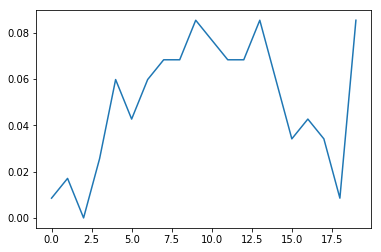

In [28]:
from matplotlib import pyplot as plt
plt.plot(matrix_prob[0,18,:])
plt.show()
plt.close()

In [29]:
matrix_prob[0][0]

array([ 0.15789474,  0.01315789,  0.02192982,  0.02631579,  0.03508772,
        0.04385965,  0.04824561,  0.12719298,  0.09210526,  0.04824561,
        0.05263158,  0.04824561,  0.03508772,  0.06578947,  0.03508772,
        0.05701754,  0.01754386,  0.01315789,  0.02192982,  0.03947368])

In [30]:
level_pro = [-10] + [np.mean(i) for i in levels[1:10]] + [np.mean(i) for i in levels[10:-1]] + [10]
print(level_pro)

[-10, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 10]


In [31]:
def expected(prob,level_win):
    output = []
    for i in range(len(prob)):
        # level
        s = []
        if i < len(prob)/2:
            max_p = level_win[i]
            for j in range(len(prob)):
                if j < len(prob)/2:
                    p = max(max_p, level_win[j])
                    s.append(abs(p*prob[j]))
                else:
                    p = abs(max_p - level_win[j])
                    s.append(-abs(p*prob[j]))
        else:
            max_p = level_win[i]
            for j in range(len(prob)):
                if j < len(prob)/2:
                    p = abs(max_p - level_win[j])
                    s.append(-abs(p*prob[j]))
                else:
                    p = min(max_p, level_win[j])
                    s.append(abs(p*prob[j]))
        output.append(sum(s))
    return output                    
            
            
                    
                
                
        

In [32]:
expected([0.3, 0.4, 0.2, 0.1], [-5,-1,1,5])

[-0.30000000000000027, -0.30000000000000016, -2.2999999999999994, -4.7]

In [33]:
for i in range(5):
    print([np.argmax(expected(i, level_pro)) for i in matrix_prob[i]])

[7, 5, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 10, 11, 16]
[0, 1, 9, 9, 7, 8, 9, 9, 10, 10, 10, 10, 10, 11, 9, 8, 9, 8, 10, 10]
[13, 16, 11, 11, 12, 11, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 10, 8, 10, 11]
[12, 11, 10, 8, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 9, 10, 8, 9, 10]
[19, 14, 13, 13, 11, 10, 10, 10, 10, 9, 9, 9, 8, 8, 9, 8, 8, 9, 9, 12]


### 得分

In [34]:
def expect_margin(predictions, answer):
    predict_sign = np.sign(predictions)
    answer_sign = np.sign(answer)
    margin_array = []
    for m in range(answer.shape[0]):
        row = []
        for n in range(answer.shape[1]):
            a = answer[m, n]
            p = predictions[m, n]
            p_s = predict_sign[m, n]
            a_s = answer_sign[m, n]
            if p_s == a_s:
                row.append(min(abs(a), abs(p)))
            elif p_s != a_s and a*p != 0:
                row.append(-1*(abs(a)+abs(p)))
            else:
                row.append(-1*a)
        margin_array.append(row)
    margin_array = np.array(margin_array)
    return np.sum(margin_array,0)


def BOTscoreCal(pred, ans):
    ans = np.array(list(ans))
    margin1 = expect_margin(pred, np.array(ans))  # 选手预测的三日预期收益
    margin2 = expect_margin(np.array(ans), np.array(ans))  # 完美预测的三日预期收益
    margin_rate = np.divide(margin1, margin2)
    BOTscore = np.sum(margin_rate)
    return BOTscore

In [35]:
def predict(d1, d2, d3):
    v1 = np.argmax(expected(matrix_t0_prob[d1], level_pro))
    v2 = np.argmax(expected(matrix_prob[d2][v1], level_pro))
    v3 = np.argmax(expected(matrix_prob[d3][v2], level_pro))
    return([level_pro[v1]/100, level_pro[v2]/100, level_pro[v3]/100])

In [36]:
preds = []
ans = []
for i in data:
    preds.append(predict(i.d1-2, i.d2-2, i.d3-2))
    ans.append([i.v1,i.v2,i.v3])

### 得分

In [37]:
BOTscoreCal(np.array(preds), np.array(ans))

-1.4524251798476038

In [38]:
import random

### 得分分布

In [39]:
for i in range(10):
    preds = []
    ans = []
    random.shuffle(data)
    for i in data[:1000]:
        preds.append(predict(i.d1-2, i.d2-2, i.d3-2))
        ans.append([i.v1,i.v2,i.v3])
    print(BOTscoreCal(np.array(preds), np.array(ans)))
        

-1.57927783862
-1.49810637572
-1.44929944573
-1.52167588395
-1.42376186718
-1.42967924369
-1.44451102051
-1.35826836084
-1.55698701581
-1.43031383532


In [40]:
len([i for i in data if abs(i.v1) >= 0.07])

1873

## 初赛 第三次提交

In [41]:
with open('./pricedetail3.json') as f:
    third = json.load(f)

In [42]:
third[:5]

[{'d0_wd': 4,
  'd1_wd': 5,
  'd2_wd': 6,
  'd3_wd': 2,
  'uuid': 'A8379EB0-2BDE-4F79-9B89-AE746C58CBBF'},
 {'d0_wd': 5,
  'd1_wd': 6,
  'd2_wd': 2,
  'd3_wd': 3,
  'uuid': '80C9389A-294B-4BA1-8CCB-05F63CBBCD83'},
 {'d0_wd': 5,
  'd1_wd': 6,
  'd2_wd': 2,
  'd3_wd': 3,
  'uuid': '9E405056-F138-4473-B0B2-587878C2B26E'},
 {'d0_wd': 6,
  'd1_wd': 2,
  'd2_wd': 3,
  'd3_wd': 4,
  'uuid': '355A6845-F424-438F-85A3-68B40ED70B3D'},
 {'d0_wd': 4,
  'd1_wd': 5,
  'd2_wd': 6,
  'd3_wd': 2,
  'uuid': '24E57A5F-8979-4E58-9D84-6131C03C11EC'}]

In [43]:
for i in third:
    tmp = predict(i['d1_wd']-2, i['d2_wd']-2, i['d3_wd']-2)
    i['value1'] = tmp[0]
    i['value2'] = tmp[1]
    i['value3'] = tmp[2]


In [49]:
third[:3]

[{'d0_wd': 4,
  'd1_wd': 5,
  'd2_wd': 6,
  'd3_wd': 2,
  'uuid': 'A8379EB0-2BDE-4F79-9B89-AE746C58CBBF',
  'value1': 0.0050000000000000001,
  'value2': -0.0050000000000000001,
  'value3': 0.0050000000000000001},
 {'d0_wd': 5,
  'd1_wd': 6,
  'd2_wd': 2,
  'd3_wd': 3,
  'uuid': '80C9389A-294B-4BA1-8CCB-05F63CBBCD83',
  'value1': -0.0050000000000000001,
  'value2': 0.0050000000000000001,
  'value3': 0.0050000000000000001},
 {'d0_wd': 5,
  'd1_wd': 6,
  'd2_wd': 2,
  'd3_wd': 3,
  'uuid': '9E405056-F138-4473-B0B2-587878C2B26E',
  'value1': -0.0050000000000000001,
  'value2': 0.0050000000000000001,
  'value3': 0.0050000000000000001}]

In [45]:
with open('submit3.json', 'w') as f:
    json.dump(third, f)

### 复赛第一次

In [46]:
with open('test1_labs_clean.txt') as f:
    d = [i.split('\t') for i in f.read().split('\n') if i]

In [47]:
d[0]

['图片名称',
 '收盘日d',
 '收盘日d+1',
 '收盘日d+2',
 '收盘日d+3',
 '过去120天最高价',
 '过去120天最低价',
 '过去120天最高成交量',
 '过去120天最低成交量',
 '过去120天最高KDJ',
 '过去120天最低KDJ']

In [50]:
out3 = []
for i in d[1:]:
    if i[0] not in ['97dcf665731f412a9858501c556b7b23.jpg', '63cbb0c43d5140acb0e2761bb8fe84c2.jpg']: # 未存在图片
        out3.append({'d1_wd': int(i[2]), 'd2_wd': int(i[3]), 'd3_wd': int(i[4])})
        

In [51]:
for i in out3:
    tmp = predict(i['d1_wd']-2, i['d2_wd']-2, i['d3_wd']-2)
    i['value1'] = tmp[0]
    i['value2'] = tmp[1]
    i['value3'] = tmp[2]

In [52]:
out3[:4]

[{'d1_wd': 5,
  'd2_wd': 6,
  'd3_wd': 2,
  'value1': 0.0050000000000000001,
  'value2': -0.0050000000000000001,
  'value3': 0.0050000000000000001},
 {'d1_wd': 4,
  'd2_wd': 5,
  'd3_wd': 6,
  'value1': 0.0050000000000000001,
  'value2': -0.0050000000000000001,
  'value3': -0.0050000000000000001},
 {'d1_wd': 2,
  'd2_wd': 6,
  'd3_wd': 2,
  'value1': 0.0050000000000000001,
  'value2': -0.0050000000000000001,
  'value3': 0.0050000000000000001},
 {'d1_wd': 6,
  'd2_wd': 2,
  'd3_wd': 3,
  'value1': -0.0050000000000000001,
  'value2': 0.0050000000000000001,
  'value3': 0.0050000000000000001}]

In [53]:
with open('retest1.json', 'w') as f:
    json.dump(out3, f)